In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                     "parental": "gray"
                    } 
treatments_list = ["W", "I", "K", "parental"]
passages_list = ["p0", "p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c', "vs"]

In [3]:
fname = "all_mutations.annotated.filtered.csv"
df = pd.read_csv(fname)

In [4]:
df['genotype'] = df['file'].str.split("/").str[2].str.split("_").str[0]
df['rep'] = df['file'].str.split("/").str[2].str.split("_").str[2]
df['passage'] = df['file'].str.split("/").str[2].str.split("_").str[1]
df['n_var'] = df['Rvar'] + df['Fvar']
df['n_tot'] = df['Rtot'] + df['Ftot']
df['frequency'] = df['n_var'] / df['n_tot']
df['position'] = df['POS'] 
df['mutation'] = df['REF'] + df['POS'].astype(str) + df['ALT']

In [5]:
# define mutation spectrum 

mutation_spectrum_bins = [(0.0001,0.001),(0.001,0.01), (0.01,0.1), (0.1,0.5) , (0.5,1) ]
mutation_spectrum_bins_labels = ["[0.0001, 0.001)","[0.001, 0.01)", "[0.01,0.1)" , "[0.1,0.5)" , "[0.5,1)"]


In [19]:
# compute mutation spectrum 

df_diversity = pd.DataFrame()

                
for v in df['virus'].unique():
    for t in treatments_list:
        for p in passages_list:
            for r in replicates_list:

                df_temp = df[(df['genotype']== t)]
                df_temp = df_temp[df_temp['passage']==p]
                df_temp = df_temp[df_temp['rep']==r]
                df_temp = df_temp[df_temp['virus']==v]
                
                if df_temp.shape[0]>0:
                    for bin_label, curr_bin in zip(mutation_spectrum_bins_labels, mutation_spectrum_bins):
                        df_t = df_temp[df_temp["frequency"] >= curr_bin[0]]
                        df_t = df_t[df_t["frequency"] < curr_bin[1]]
                        counts = df_t.shape[0]

                        dict_t = {'genotype': [t], 
                                  'virus': v, 
                                  'passage': p, 
                                  'rep': r,
                                   "mutation_freq": str(bin_label), 
                                   "number_SNVs": counts}
                        df_diversity = pd.concat([df_diversity, pd.DataFrame(data=dict_t)])
                
df_diversity = df_diversity.reset_index()

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_83430/2134079160.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


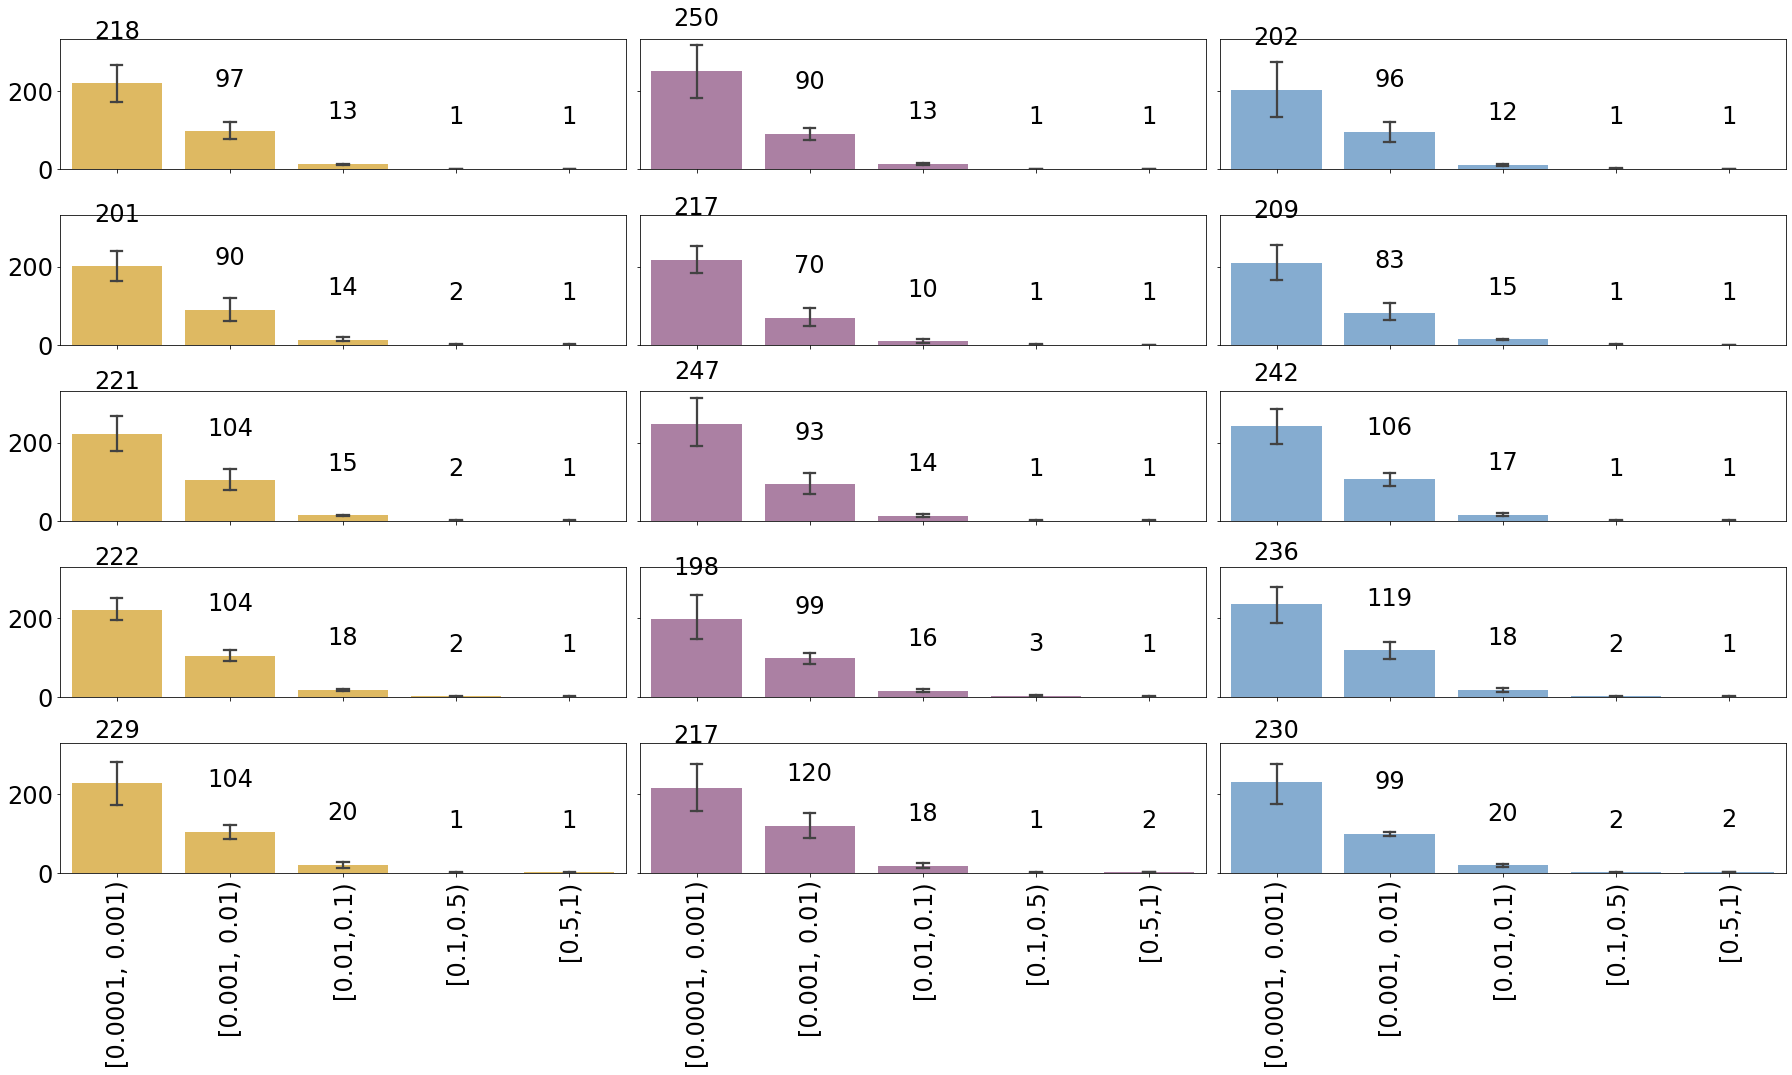

In [29]:
df_t = df_diversity[df_diversity['virus']=='crpv']

fig, ax = plt.subplots(5,3, sharex=True, sharey=True, figsize=(25,15))

gt_order = ["W", "K", "I"]
passage_order = ["p1", "p2", "p3", "p5", "p10"]

for idx_gt, gt in enumerate(gt_order):
    for idx_passage, passage in enumerate(passage_order):
        data = df_diversity[(df_diversity["genotype"]==gt) & (df_diversity["passage"]==passage)]

        gt_color = our_color_palette[gt]

        sns.barplot(
            ax=ax[idx_passage][idx_gt],
            data=data, 
            x="mutation_freq", 
            y='number_SNVs', 
            capsize=0.1,
            order=mutation_spectrum_bins_labels, 
            color=gt_color,
            dodge=0.3, 
        )
        ax[idx_passage][idx_gt].set_xlabel("")
        ax[idx_passage][idx_gt].set_ylabel("")
        
        #ax[idx_passage][idx_gt].set_ylim((0,320))
        
        # add the annotation
        ax[idx_passage][idx_gt].bar_label(ax[idx_passage][idx_gt].containers[-1], 
                                          fmt='%.f', 
                                          label_type='edge', 
                                          padding = 40,
                                          size = 24)

        
        
ax[4][0].tick_params(axis='x', labelsize = 24, rotation=90)
ax[4][1].tick_params(axis='x', labelsize = 24, rotation=90)
ax[4][2].tick_params(axis='x', labelsize = 24, rotation=90)

ax[0][0].tick_params(axis='y', labelsize = 24)
ax[1][0].tick_params(axis='y', labelsize = 24)
ax[2][0].tick_params(axis='y', labelsize = 24)
ax[3][0].tick_params(axis='y', labelsize = 24)
ax[4][0].tick_params(axis='y', labelsize = 24)

ax[0][2].set_ylabel("Passage 1", fontsize=30)
ax[0][2].yaxis.set_label_position("right")
ax[1][2].set_ylabel("Passage 2", fontsize=30)
ax[1][2].yaxis.set_label_position("right")
ax[2][2].set_ylabel("Passage 3", fontsize=30)
#ax[2][2].yaxis.set_label_position("right")
ax[3][2].set_ylabel("Passage 5", fontsize=30)
#ax[3][2].yaxis.set_label_position("right")
ax[4][2].set_ylabel("Passage 10", fontsize=30)
#ax[4][2].yaxis.set_label_position("right")

#ax[2][0].set_ylabel("number of SNVs", fontsize=30)
#ax[2][0].yaxis.set_label_position("left")
  

fig.tight_layout()
fig.show()

fig.savefig("/Users/lfuhrmann/Downloads/oscar_diversity/mutation_spectrum_crpv.pdf")

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_83430/4039922943.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


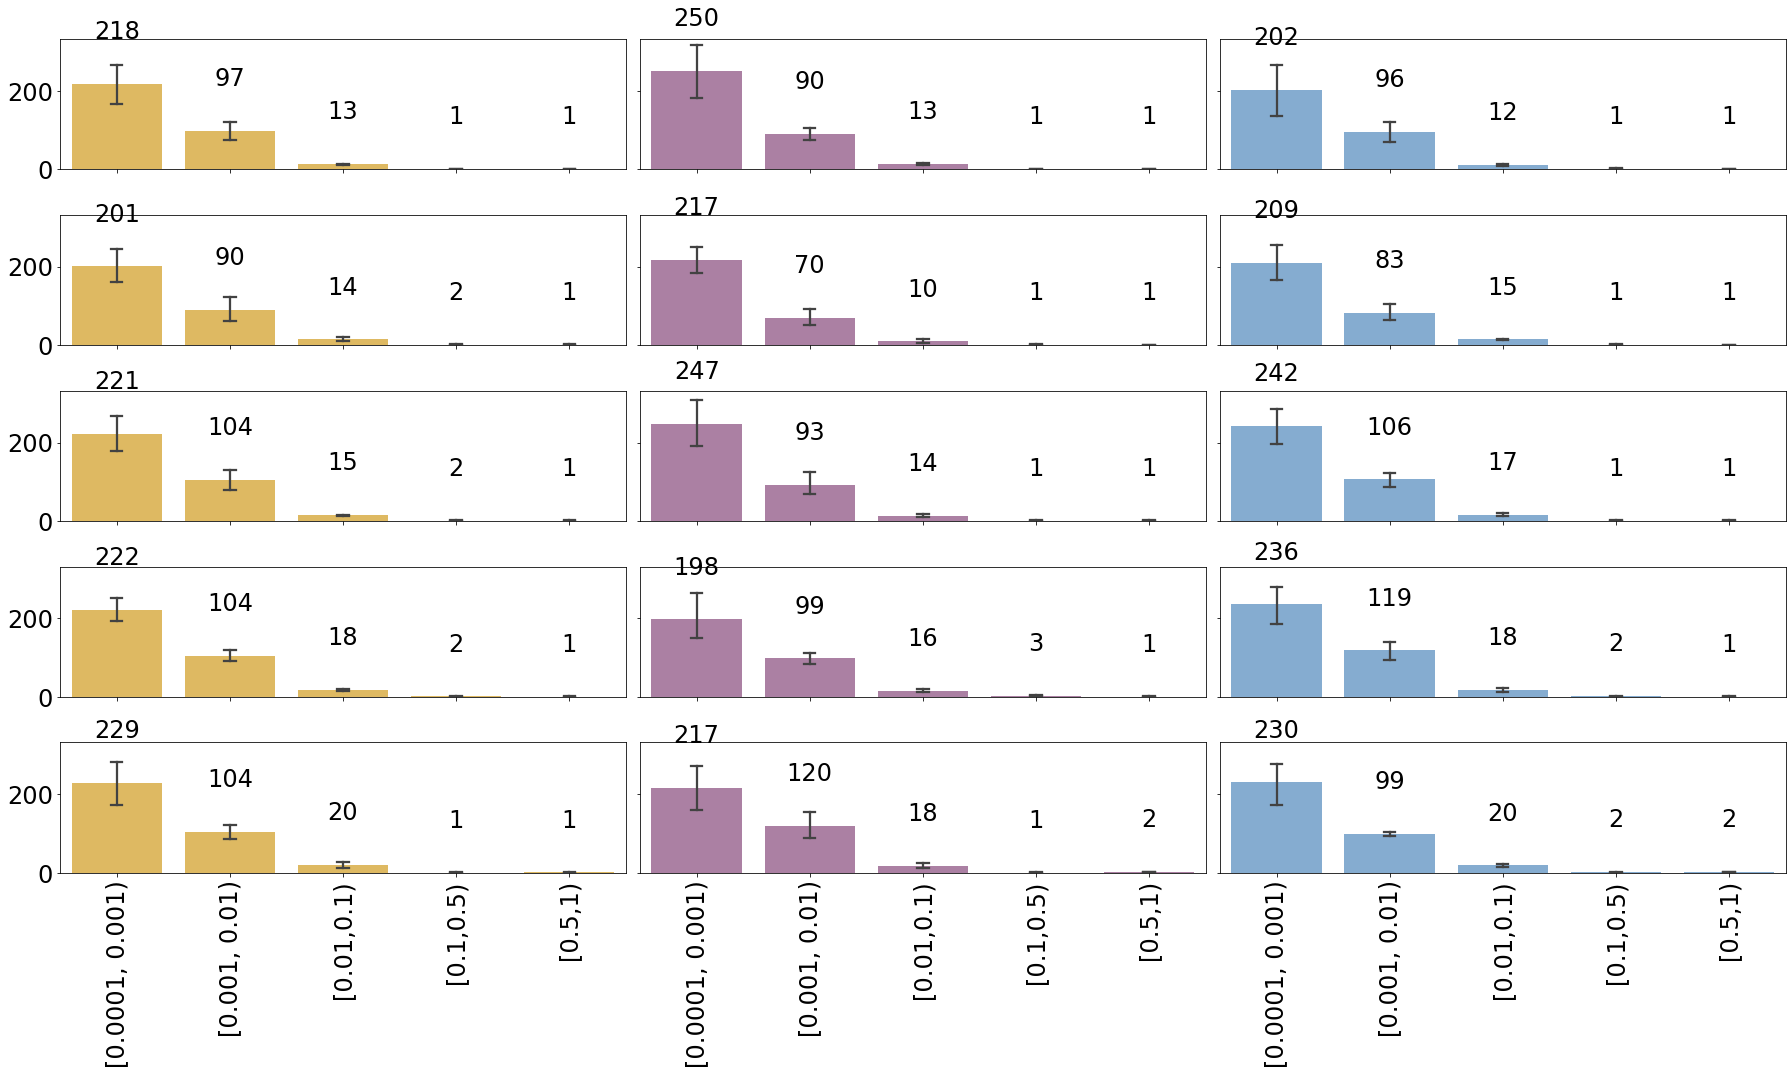

In [30]:
df_t = df_diversity[df_diversity['virus']=='dcv']

fig, ax = plt.subplots(5,3, sharex=True, sharey=True, figsize=(25,15))

gt_order = ["W", "K", "I"]
passage_order = ["p1", "p2", "p3", "p5", "p10"]

for idx_gt, gt in enumerate(gt_order):
    for idx_passage, passage in enumerate(passage_order):
        data = df_diversity[(df_diversity["genotype"]==gt) & (df_diversity["passage"]==passage)]

        gt_color = our_color_palette[gt]

        sns.barplot(
            ax=ax[idx_passage][idx_gt],
            data=data, 
            x="mutation_freq", 
            y='number_SNVs', 
            capsize=0.1,
            order=mutation_spectrum_bins_labels, 
            color=gt_color,
            dodge=0.3, 
        )
        ax[idx_passage][idx_gt].set_xlabel("")
        ax[idx_passage][idx_gt].set_ylabel("")
        
        #ax[idx_passage][idx_gt].set_ylim((0,320))
        
        # add the annotation
        ax[idx_passage][idx_gt].bar_label(ax[idx_passage][idx_gt].containers[-1], 
                                          fmt='%.f', 
                                          label_type='edge', 
                                          padding = 40,
                                          size = 24)

        
        
ax[4][0].tick_params(axis='x', labelsize = 24, rotation=90)
ax[4][1].tick_params(axis='x', labelsize = 24, rotation=90)
ax[4][2].tick_params(axis='x', labelsize = 24, rotation=90)

ax[0][0].tick_params(axis='y', labelsize = 24)
ax[1][0].tick_params(axis='y', labelsize = 24)
ax[2][0].tick_params(axis='y', labelsize = 24)
ax[3][0].tick_params(axis='y', labelsize = 24)
ax[4][0].tick_params(axis='y', labelsize = 24)

ax[0][2].set_ylabel("Passage 1", fontsize=30)
#ax[0][2].yaxis.set_label_position("left")
ax[1][2].set_ylabel("Passage 2", fontsize=30)
ax[1][2].yaxis.set_label_position("right")
ax[2][2].set_ylabel("Passage 3", fontsize=30)
#ax[2][2].yaxis.set_label_position("right")
ax[3][2].set_ylabel("Passage 5", fontsize=30)
#ax[3][2].yaxis.set_label_position("right")
ax[4][2].set_ylabel("Passage 10", fontsize=30)
#ax[4][2].yaxis.set_label_position("right")

#ax[2][0].set_ylabel("number of SNVs", fontsize=30)
#ax[2][0].yaxis.set_label_position("left")
  

fig.tight_layout()
fig.show()

fig.savefig("/Users/lfuhrmann/Downloads/oscar_diversity/mutation_spectrum_dcv.pdf")